In [1]:
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
muts_df = pd.read_pickle("./data/4_7_df.pkl")
muts_df.shape

(2641, 45)

In [3]:
cond_cnt_d = {"none": 0}
feat_cnt = 0
for _, mut in muts_df.iterrows():
    for feat in mut["genomic features"]:
        feat_cnt += 1
        if len(feat["significantly associated conditions"]) > 0:
            for cond in feat["significantly associated conditions"]:
                if cond in cond_cnt_d.keys():                   
                    cond_cnt_d[cond] += 1
                else:
                    cond_cnt_d[cond] = 1
        else:
            cond_cnt_d["none"] += 1

cond_cnt_d

{'none': 2412,
 'glucose(4)': 229,
 'NaCl(0.5g/L) trace elements': 376,
 '42 celsius': 64,
 'U-13C glucose(2)': 27,
 'Δpts': 34,
 'GMOS': 9,
 'Δgnd': 20,
 'Δpgi': 133,
 'Δsdh': 23,
 'Δtpi': 45,
 'glycerol(2.5)': 92,
 'glucose(2)': 1168,
 '20uM FeSO4 and 10mM sodium citrate': 18,
 'D-2-deoxyribose': 41,
 'D-arabinose': 13,
 'D-lyxose': 18,
 'm-tartrate': 16,
 'monomethyl succinate': 18,
 "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution.": 23,
 'ΔsdaA ΔsdaB ΔtdcG ΔglyA': 23,
 'acetate(4)': 21,
 'glucose(4) or acetate(4)': 50,
 'glucose(4) or glycerol(2.5)': 18,
 'glucose(4) or xylose(4)': 31,
 'xylose(4)': 9,
 '2 3-butanediol': 89,
 'adipic acid': 38,
 'coumaric acid': 44,
 'glutaric acid': 37,
 'hexamethylenediamine': 10,
 'hexanoic acid': 44,
 'isobutyric acid': 17,
 'n-butanol': 67,
 'octanoic acid': 17,
 'propanediol': 4,
 'putrescine': 31}

In [4]:
# import seaborn as sns
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.dpi"] = 300
# sns.set_context("paper")
# sns.set_style("ticks")

# cond_cnt_df = pd.DataFrame()
# for key, val in cond_cnt_d.items():
#     cond_cnt_df = cond_cnt_df.append({"condition": key, "mutated feature count": val, "proportion":val/feat_cnt}, ignore_index=True)
# display(cond_cnt_df)

# cond_cnt_df = cond_cnt_df.sort_values(by="mutated feature count", ascending=True)

# ax = cond_cnt_df.plot.barh(
#     y="mutated feature count",
#     x="condition",
#     color="#4C72B0",
#     figsize=(2,1),
#     width=1
# )

# cond_cnt_df = cond_cnt_df.reset_index()  # Resetting index for the below annotations to work
# for i, r in cond_cnt_df.iterrows(): 
#     s = str(int(r["mutated feature count"])) +' (%{0:.1f})'.format(r["proportion"] * 100)
#     ax.text(r["mutated feature count"], i-0.35,  s)
# sns.despine(ax=ax, top=True, right=True)
# ax.set_title("The proportion of mutated features\nstatistically associated with conditions")
# ax.get_legend().remove()
# sns.despine(ax=ax, top=True, right=True)
# ax.set_ylabel('')
# ax.set_xlabel("mutated feature count")

In [5]:
import pickle
f = open("./data/signif_genomic_feat_cond_json.pkl", 'rb')   
signif_genomic_feat_cond_json = pickle.load(f)
signif_genomic_feat_cond_json[0:5]

[{'mutated features': 'ackA',
  'condition': 'Δpgi',
  'odd ratio': 19.76830318690784,
  'p value': 0.005611374257331419},
 {'mutated features': 'actP',
  'condition': 'D-lyxose',
  'odd ratio': 91.47619047619048,
  'p value': 0.0002902952921727443},
 {'mutated features': 'aldA TFBS',
  'condition': 'D-2-deoxyribose',
  'odd ratio': 11.347999005717126,
  'p value': 1.3022780635838894e-06},
 {'mutated features': 'araA',
  'condition': 'Δpts',
  'odd ratio': 101.02921840759679,
  'p value': 5.816691914618809e-06},
 {'mutated features': 'araC',
  'condition': 'D-arabinose',
  'odd ratio': 122.005291005291,
  'p value': 0.0001667390157604181}]

In [6]:
def get_signif_mut_conds(feat_name):
    signif_mut_conds = []
    for signif_mut_cond in signif_genomic_feat_cond_json:
        if signif_mut_cond['mutated features'] == feat_name:
            signif_mut_conds.append(signif_mut_cond)
    return signif_mut_conds
    
    

cond_mut_feat_assoc_df = pd.DataFrame()
for _, mut in muts_df.iterrows():
    for feat in mut["genomic features"]:
        signif_mut_conds = get_signif_mut_conds(feat["name"])
        for d in signif_mut_conds:
            cond_mut_feat_assoc_df = cond_mut_feat_assoc_df.append(d, ignore_index=True)

cond_mut_feat_assoc_df.head()

,condition,mutated features,odd ratio,p value
0,NaCl(0.5g/L) trace elements,rph-pyrE attenuator terminator,1.562008,1.464494e-04
1,U-13C glucose(2),rph-pyrE attenuator terminator,5.779091,2.707680e-03
2,glucose(4),rph-pyrE attenuator terminator,2.900920,2.577622e-10
3,glucose(4) or acetate(4),rph-pyrE attenuator terminator,3.985989,1.486917e-03
4,glucose(4) or glycerol(2.5),rph-pyrE attenuator terminator,8.545092,5.791925e-04


In [7]:
gyd_cond_mut_feat_assoc_df = cond_mut_feat_assoc_df[cond_mut_feat_assoc_df["condition"].isin(cond_cnt_d.keys())].copy()

cross_counts_df = pd.crosstab(
    gyd_cond_mut_feat_assoc_df["mutated features"],
    gyd_cond_mut_feat_assoc_df["condition"]
)

cross_counts_df.head()

condition,2 3-butanediol,20uM FeSO4 and 10mM sodium citrate,42 celsius,D-2-deoxyribose,D-arabinose,D-lyxose,GMOS,NaCl(0.5g/L) trace elements,U-13C glucose(2),acetate(4),adipic acid,coumaric acid,glucose(2),glucose(4),glucose(4) or acetate(4),glucose(4) or glycerol(2.5),glucose(4) or xylose(4),glutaric acid,glycerol(2.5),glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,hexamethylenediamine,hexanoic acid,isobutyric acid,m-tartrate,monomethyl succinate,n-butanol,octanoic acid,propanediol,putrescine,xylose(4),Δgnd,Δpgi,Δpts,ΔsdaA ΔsdaB ΔtdcG ΔglyA,Δsdh,Δtpi
mutated features,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ackA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
actP,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aldA TFBS,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
araA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
araC,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
bin_df = cross_counts_df.copy()
for ir, r in bin_df.iterrows():
    for ic, c in r.items():
        if bin_df.loc[ir, ic] > 0:
            bin_df.loc[ir, ic] = 1
display(bin_df.head())

condition,2 3-butanediol,20uM FeSO4 and 10mM sodium citrate,42 celsius,D-2-deoxyribose,D-arabinose,D-lyxose,GMOS,NaCl(0.5g/L) trace elements,U-13C glucose(2),acetate(4),adipic acid,coumaric acid,glucose(2),glucose(4),glucose(4) or acetate(4),glucose(4) or glycerol(2.5),glucose(4) or xylose(4),glutaric acid,glycerol(2.5),glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,hexamethylenediamine,hexanoic acid,isobutyric acid,m-tartrate,monomethyl succinate,n-butanol,octanoic acid,propanediol,putrescine,xylose(4),Δgnd,Δpgi,Δpts,ΔsdaA ΔsdaB ΔtdcG ΔglyA,Δsdh,Δtpi
mutated features,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ackA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
actP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aldA TFBS,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
araA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
araC,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I actually wan to consider all mutated features, not just those that are significant

In [9]:
odds_df = bin_df.copy()
for feat, r in bin_df.iterrows():
    for cond, c in r.items():
        if bin_df.loc[feat, cond] > 0:
            odd_ratio = 0
            df = cond_mut_feat_assoc_df[
                (cond_mut_feat_assoc_df["condition"]==cond)
                & (cond_mut_feat_assoc_df["mutated features"]==feat)]["odd ratio"]
            if len(df):
                odd_ratio = df.unique()
            odds_df.loc[feat, cond] = odd_ratio
            
# odds_df = odds_df[odds_df.index.isin(signif_gen_targ_s)]
# odds_df.index = '*'+odds_df.index
odds_df.head()

condition,2 3-butanediol,20uM FeSO4 and 10mM sodium citrate,42 celsius,D-2-deoxyribose,D-arabinose,D-lyxose,GMOS,NaCl(0.5g/L) trace elements,U-13C glucose(2),acetate(4),adipic acid,coumaric acid,glucose(2),glucose(4),glucose(4) or acetate(4),glucose(4) or glycerol(2.5),glucose(4) or xylose(4),glutaric acid,glycerol(2.5),glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,hexamethylenediamine,hexanoic acid,isobutyric acid,m-tartrate,monomethyl succinate,n-butanol,octanoic acid,propanediol,putrescine,xylose(4),Δgnd,Δpgi,Δpts,ΔsdaA ΔsdaB ΔtdcG ΔglyA,Δsdh,Δtpi
mutated features,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ackA,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.768303,0.000000,0.0,0.0,0.0
actP,0.0,0.0,0.0,0.000000,0.000000,91.47619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
aldA TFBS,0.0,0.0,0.0,11.347999,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
araA,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,101.029218,0.0,0.0,0.0
araC,0.0,0.0,0.0,0.000000,122.005291,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [10]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util.metadata_categories_for_associations import METADATA_CATEGORIES_FOR_ASSOCIATIONS

exp_conds_df = muts_df[METADATA_CATEGORIES_FOR_ASSOCIATIONS].drop_duplicates()
exp_conds_df

,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
204,37 celsius,U-13C glucose(2),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
240,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpts,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
271,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,GMOS,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
284,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δgnd,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
306,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δpgi,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
408,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δsdh,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
427,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δtpi,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
478,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
630,37 celsius,glycerol(2.5),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [11]:
# Adding zeros to other condition categories possibly to represented to ensure all are in the following headmaps
for i in exp_conds_df.columns:
    c = exp_conds_df.at[exp_conds_df.index[0], i]
    if c not in odds_df.columns:
        odds_df[c] = 0

odds_df.head()

condition,2 3-butanediol,20uM FeSO4 and 10mM sodium citrate,42 celsius,D-2-deoxyribose,D-arabinose,D-lyxose,GMOS,NaCl(0.5g/L) trace elements,U-13C glucose(2),acetate(4),adipic acid,coumaric acid,glucose(2),glucose(4),glucose(4) or acetate(4),glucose(4) or glycerol(2.5),glucose(4) or xylose(4),glutaric acid,glycerol(2.5),glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,hexamethylenediamine,hexanoic acid,isobutyric acid,m-tartrate,monomethyl succinate,n-butanol,octanoic acid,propanediol,putrescine,xylose(4),Δgnd,Δpgi,Δpts,ΔsdaA ΔsdaB ΔtdcG ΔglyA,Δsdh,Δtpi,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ackA,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.768303,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0
actP,0.0,0.0,0.0,0.000000,0.000000,91.47619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0
aldA TFBS,0.0,0.0,0.0,11.347999,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0
araA,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,101.029218,0.0,0.0,0.0,0,0,0,0,0,0,0
araC,0.0,0.0,0.0,0.000000,122.005291,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0


In [12]:
from util.metadata import get_all_exp_cond_d

all_exp_cond_d = get_all_exp_cond_d("./data/metadata/")
all_exp_cond_d

{'Iron-ALE': {'taxonomy-id': '511145',
  'strain-description': 'WT',
  'temperature': '37 celsius',
  'base-media': 'M9',
  'carbon-source': 'glucose(2)',
  'nitrogen-source': 'NH4Cl(1)',
  'phosphorous-source': 'KH2PO4(3) Na2HPO4(6.8)',
  'sulfur-source': 'MgSO4(0.24)',
  'supplement': '20uM FeSO4 and 10mM sodium citrate',
  'calcium-source': 'CaCl2(0.1)'},
 'TOL_glutaric_acid': {'supplement': 'glutaric acid',
  'taxonomy-id': '511145',
  'strain-description': 'WT',
  'temperature': '37 celsius',
  'base-media': 'M9',
  'carbon-source': 'glucose(2)',
  'nitrogen-source': 'NH4Cl(1)',
  'phosphorous-source': 'KH2PO4(3) Na2HPO4(6.8)',
  'sulfur-source': 'MgSO4(0.24)',
  'calcium-source': 'CaCl2(0.1)'},
 'TEE': {'taxonomy-id': '413997',
  'strain-description': 'REL7000',
  'base-media': 'DM25',
  'temperature': '37 celsius',
  'carbon-source': 'glucose(0.025)',
  'nitrogen-source': 'NH4Cl',
  'phosphorous-source': 'KH2PO4',
  'sulfur-source': 'MgSO4',
  'supplement': ''},
 'MG1655-M9-NC_0

In [13]:
units_replace_d = {
    "acetate(4)": "acetate(4g/L)",
    "glucose(4) or glycerol(2.5)": "glucose(4g/L) or glycerol(2.5g/L)",
    "glucose(4) or acetate(4)": "glucose(4g/L) or acetate(4g/L)",
    "glucose(4) or xylose(4)": "glucose(4g/L) or xylose(4g/L)",
    "CaCl2(0.1)": "CaCl2(0.1mM)",
    "U-13C glucose(2)": "U-13C glucose(2g/L)",
    "glycerol(2.5)": "glycerol(2.5g/L)",
    "glucose(2)": "glucose(2g/L)",
    "glucose(4)": "glucose(4g/L)",
    "NH4Cl(2)": "NH4Cl(2g/L)",
    "NH4Cl(1)": "NH4Cl(1g/L)",
    "KH2PO4(6) Na2HPO4(13.6)": "KH2PO4(6g/L), Na2HPO4(13.6g/L)",
    "MgSO4(24)": "MgSO4(24g/L)",
    "MgSO4(0.24)": "MgSO4(0.24g/L)",
    "KH2PO4(3)": "KH2PO4(3g/L)"
}


rename_col_d = dict()
for d in all_exp_cond_d.values():
    for cond_type, cond in d.items():

        if cond not in rename_col_d.keys():
            t = cond_type

            if t == "strain-description":
                t = "strain"
            elif t == "taxonomy-id":
                t = "organism"
            t = t.replace('-', ' ')

            c = cond
            if "celsius" in cond:
                c = cond.replace("celsius", "Celsius")
            elif cond == "511145":
                c = "$\it{E. coli}$ K-12 MG1655'"
            elif cond == "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution.":
                c = "glycine(2mM), L-serine"
            elif cond in units_replace_d.keys():
                c = units_replace_d[cond]

            rename_col_d[cond] = c + " " + t

odds_df = odds_df.rename(columns=rename_col_d)
odds_df

condition,2 3-butanediol supplement,20uM FeSO4 and 10mM sodium citrate supplement,42 Celsius temperature,D-2-deoxyribose carbon source,D-arabinose carbon source,D-lyxose carbon source,GMOS strain,NaCl(0.5g/L) trace elements supplement,U-13C glucose(2g/L) carbon source,acetate(4g/L) carbon source,adipic acid supplement,coumaric acid supplement,glucose(2g/L) carbon source,glucose(4g/L) carbon source,glucose(4g/L) or acetate(4g/L) carbon source,glucose(4g/L) or glycerol(2.5g/L) carbon source,glucose(4g/L) or xylose(4g/L) carbon source,glutaric acid supplement,glycerol(2.5g/L) carbon source,"glycine(2mM), L-serine supplement",hexamethylenediamine supplement,hexanoic acid supplement,isobutyric acid supplement,m-tartrate carbon source,monomethyl succinate carbon source,n-butanol supplement,octanoic acid supplement,propanediol supplement,putrescine supplement,xylose(4) carbon source,Δgnd strain,Δpgi strain,Δpts strain,ΔsdaA ΔsdaB ΔtdcG ΔglyA strain,Δsdh strain,Δtpi strain,WT strain,$\it{E. coli}$ K-12 MG1655' organism,M9 base media,NH4Cl(1g/L) nitrogen source,KH2PO4(3) Na2HPO4(6.8) phosphorous source,MgSO4(0.24g/L) sulfur source,CaCl2(0.1mM) calcium source
mutated features,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ackA,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.768303,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0
actP,0.0,0.0,0.000000,0.000000,0.000000,91.47619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0
aldA TFBS,0.0,0.0,0.000000,11.347999,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0
araA,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,101.029218,0.000000,0.0,0.0,0,0,0,0,0,0,0
araC,0.0,0.0,0.000000,0.000000,122.005291,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yrbNp,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,131.427350,0.000000,0.0,0.0,0,0,0,0,0,0,0
yrfF,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.677704,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.393244,50.539474,0.000000,0.0,0.0,0,0,0,0,0,0,0
yrhA,0.0,0.0,22.091871,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0


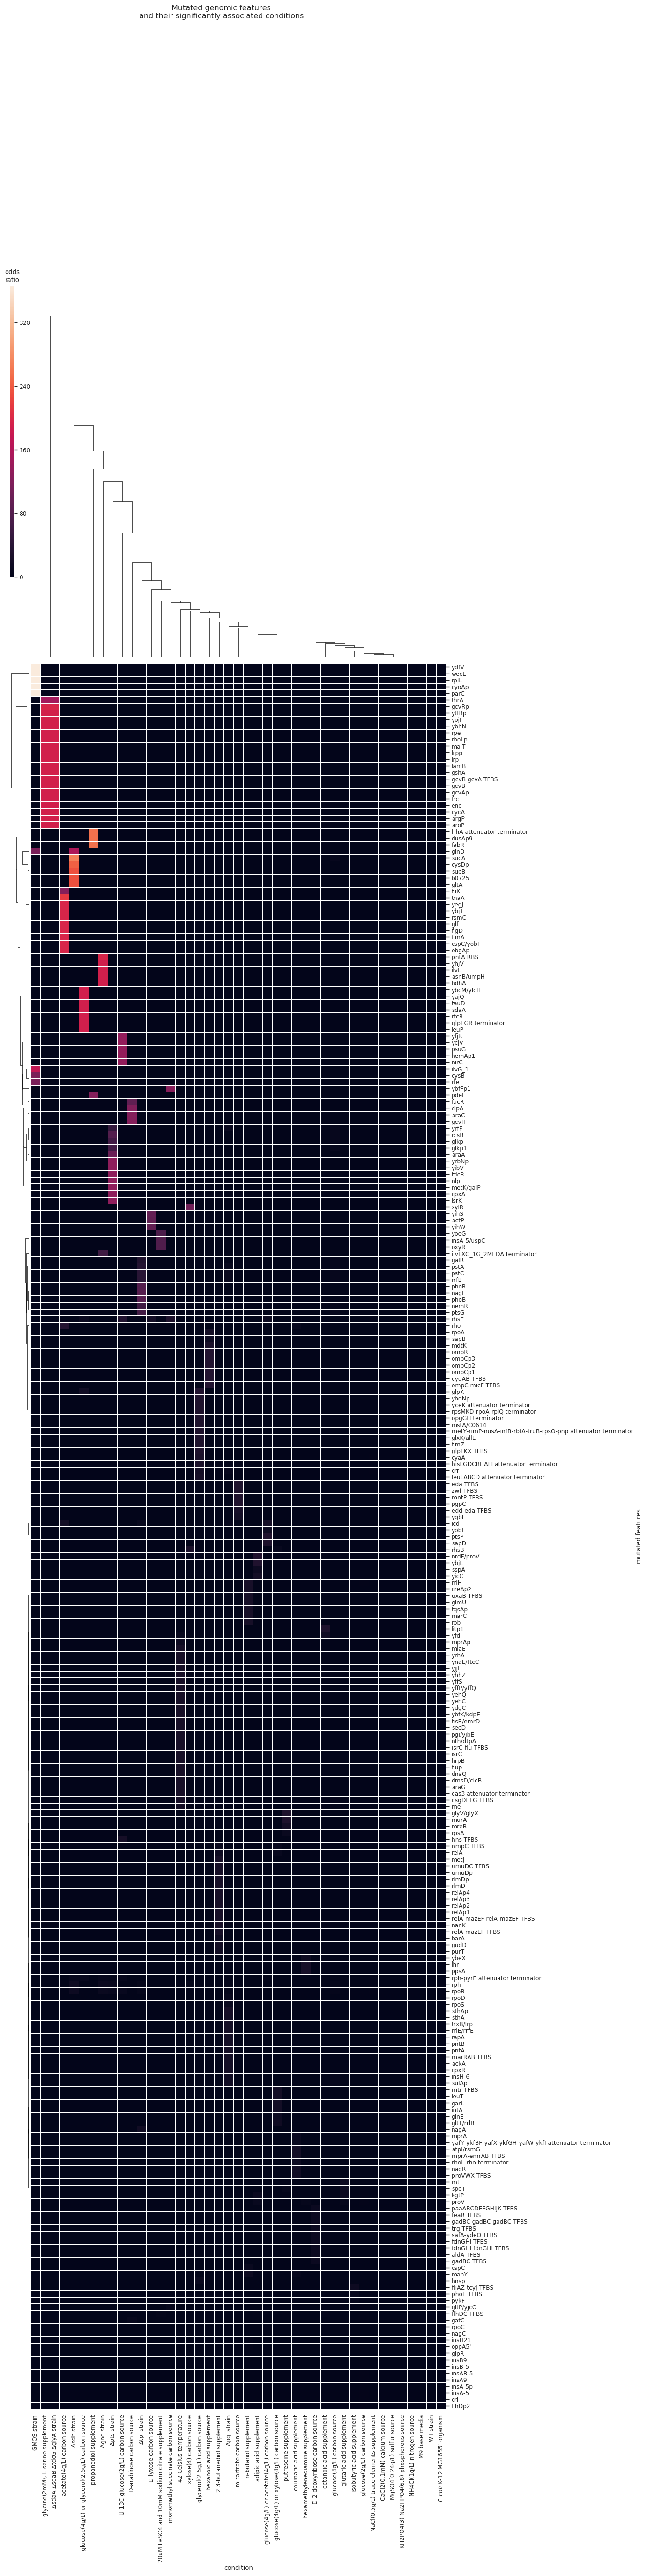

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")

g = sns.clustermap(
    odds_df,
    linewidths=0.1,
#     cmap="coolwarm",
#     xticklabels=False,
#     yticklabels=False,
    figsize=(12,60)
#     figsize=(7,13)
)

# Fix for recent matplotlib/seaborn issue
g.ax_heatmap.set_ylim(len(odds_df)+0, -0)

# g.cax.set_visible(False)
# g.ax_row_dendrogram.set_visible(False)
# g.ax_col_dendrogram.set_visible(False)
g.fig.suptitle("Mutated genomic features\nand their significantly associated conditions")
g.cax.set_title("odds\nratio")
# g.cax.yaxis.set_ticks_position("left")
# g.ax_heatmap.set_title(
#     "Overlap of associated conditions\nwith mutated genetic features",
# #     loc='top'
# )
# ax.yaxis.set_ticks_position('left')
# ax.yaxis.set_label_position("left")

# dendro_box = g.ax_row_dendrogram.get_position()
# dendro_box.x0-=0.2
# dendro_box.x1-=0.2
# g.cax.set_position(dendro_box)

# g.clustermap.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# set_xticklabels(rotation=30)
# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45)
plt.savefig("fig.svg", format="svg")

The above shows assocs, though with large differences in orders of magnitude, which can hide other assocs.  
Therefore will also show the log odds ratio, which uses the natural log.

In [15]:
log_odds_df = odds_df.copy()
import numpy as np
log_odds_df = log_odds_df.applymap(lambda c: np.log(c) if c > 0 else c)
log_odds_df.head()

condition,42 Celsius temperature,GMOS strain,"KH2PO4(6g/L), Na2HPO4(13.6g/L) phosphorous source",MgSO4(24g/L) sulfur source,NH4Cl(2g/L) nitrogen source,NaCl(1g/L) trace elements supplement,U-13C glucose(2g/L) carbon source,acetate(4g/L) carbon source,glucose(2g/L) carbon source,glucose(4g/L) carbon source,glucose(4g/L) or acetate(4g/L) carbon source,glucose(4g/L) or glycerol(2.5g/L) carbon source,glucose(4g/L) or xylose(4g/L) carbon source,glycerol(2.5g/L) carbon source,"glycine(2mM), L-serine supplement",xylose(4) carbon source,Δgnd strain,Δpgi strain,Δpts strain,ΔsdaA ΔsdaB ΔtdcG ΔglyA strain,Δsdh strain,Δtpi strain,NaCl(0.5g/L) trace elements supplement,WT strain,$\it{E. coli}$ K-12 MG1655' organism,M9 base media,NH4Cl(1g/L) nitrogen source,KH2PO4(3) Na2HPO4(6.8) phosphorous source,MgSO4(0.24g/L) sulfur source,CaCl2(0.1mM) calcium source
mutated features,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
araA,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.821763,0.0,0.0,0.0,0,0,0,0,0,0,0,0
cpxR,0.000000,0.0,3.257110,3.257110,3.257110,3.257110,0.0,0.0,2.897053,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0
crr,0.000000,0.0,2.125898,2.125898,2.125898,2.125898,0.0,0.0,1.751363,0.0,0.0,0.0,0.0,1.868467,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0
csgDEFG TFBS,1.985592,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0
cyaA,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.181352,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [16]:
d = {
    "temperature": "(T)",
    "phosphorous source": "(P)",
    "sulfur source": "(S)",
    "nitrogen source": "(N)",
    "calcium source": "(Ca)",
    "supplement": "(Sp)",
    "carbon source": "(C)",
    "organism": "(O)",
}
rename_col_d = dict()
for c in log_odds_df.columns:
    for k, v in d.items():
        if k in c:
            rename_col_d[c]=c.replace(k, v)
log_odds_df = log_odds_df.rename(columns=rename_col_d)

In [17]:
leg = '(C) carbon source\n' + \
    '(T) temperature\n' + \
    '(N) nitrogen source\n' + \
    '(P) phosphorus source\n' + \
    '(S) sulfur source\n' + \
    '(Ca) calcium source\n' + \
    '(O) organism\n' + \
    '(Sp) supplement'
leg

'(C) carbon source\n(T) temperature\n(N) nitrogen source\n(P) phosphorus source\n(S) sulfur source\n(Ca) calcium source\n(O) organism\n(Sp) supplement'

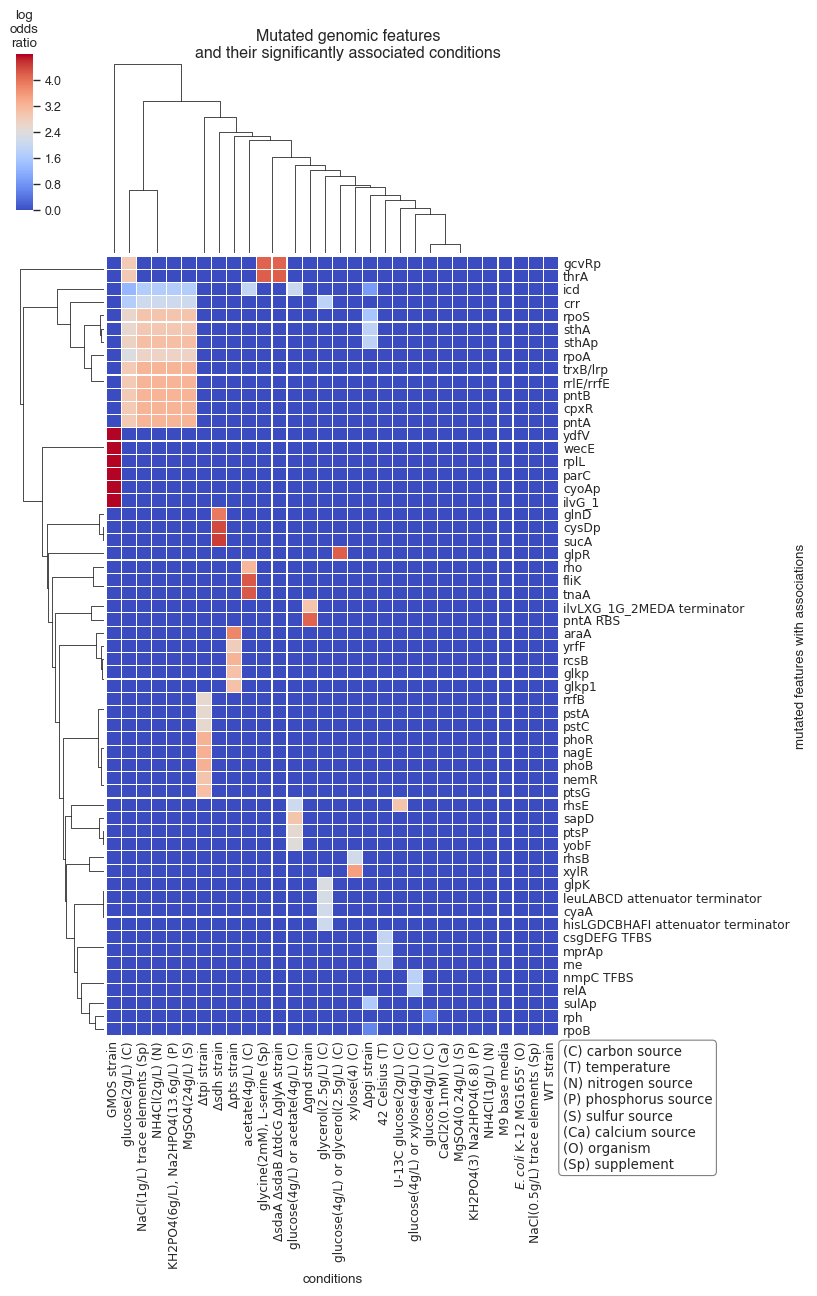

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")

g = sns.clustermap(
    log_odds_df,
    linewidths=0.1,
    cmap="coolwarm",
#     xticklabels=False,
#     yticklabels=False,
    figsize=(7,13)
)

# Fix for recent matplotlib/seaborn issue
g.ax_heatmap.set_ylim(len(log_odds_df)+0, -0)

# g.ax_row_dendrogram.set_visible(False)
# g.ax_col_dendrogram.set_visible(False)

g.fig.suptitle(
    "Mutated genomic features\nand their significantly associated conditions",
    fontname="Helvetica", 
    y=0.9,
    x=0.6
)
# g.cax.set_visible(False)
g.cax.set_title("log\nodds\nratio", fontname="Helvetica")

for tick in g.cax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in g.cax.get_yticklabels():
    tick.set_fontname("Helvetica")
    
ax = g.ax_heatmap
ax.set_xlabel("conditions", fontname="Helvetica")
ax.set_ylabel("mutated features with associations", fontname="Helvetica")

bbox_props = dict(
    boxstyle="round",
    fc="w",
    ec="0.5",
    #     alpha=0.9
)
ax.annotate(
    leg,
    xy=(1.01, -0.17),
    xycoords='axes fraction',
    #             textcoords='offset points',
    #             size=14,
    bbox=bbox_props
)

ax.tick_params(axis='both', which='both', length=0)

# g.cax.yaxis.set_ticks_position("left")
# g.ax_heatmap.set_title(
#     "Overlap of associated conditions\nwith mutated genetic features",
# )
# ax.yaxis.set_ticks_position('left')
# ax.yaxis.set_label_position("left")

# dendro_box = g.ax_row_dendrogram.get_position()
# dendro_box.x0-=0.2
# dendro_box.x1-=0.2
# g.cax.set_position(dendro_box)

# g.clustermap.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# set_xticklabels(rotation=30)
# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45)
plt.savefig("fig.svg", format="svg")